In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go

## Polynomial Regression

In [2]:
import plotly.graph_objects as go
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

fig=go.Figure()
fig=fig.add_trace(go.Scatter(x=np.reshape(X,(m,)),
                         y=np.reshape(y,(m,)),
                         name='Original Data',
                         marker_color='rgba(105, 113, 193 , 0.9)',
                         mode='markers'))
fig=fig.update_layout(height=400,width=600,title='Quadratic eqn', plot_bgcolor='rgba(0, 0, 0, 0)')
fig.update_xaxes(showticklabels=True)
fig.update_yaxes(showticklabels=True)
fig.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
poly.fit(X)
x_transformed=poly.transform(X)
x_transformed[0]

array([-2.81975859,  7.95103849])

In [4]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=-1)
lr.fit(X=x_transformed,y=y)
lr.coef_,lr.intercept_

(array([[1.04111766, 0.48264836]]), array([2.03267077]))

In [5]:
sklearn_prediction=lr.predict(x_transformed)

In [6]:
fig1 = go.Figure()
fig1 = fig1.add_trace(go.Scatter(x=np.reshape(X,(m,)),
                                 y=np.reshape(y,(m,)),
                                 name='Original Data',
                                 marker_color='rgba(105, 113, 193 , 0.9)',
                                 mode='markers'))
fig1 = fig1.add_trace(go.Scatter(x=np.reshape(X,(m,)),
                                 y=np.reshape(sklearn_prediction,(m,)),
                                 name='Sklearn Prediction',
                                 marker_color='rgba(105, 193, 117 , 0.6)',
                                 mode='markers'))
fig1 = fig1.update_layout(height=400, width=600, title='Quadratic eqn Predictions using LinearReg.', plot_bgcolor='rgba(0, 0, 0, 0)')
fig1.update_xaxes(showticklabels=False)
fig1.update_yaxes(showticklabels=False)
fig1.show()


In [7]:
poly=PolynomialFeatures(degree=30,include_bias=False)
poly.fit(X)
x_transformed=poly.transform(X)

from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=-1)
lr.fit(X=x_transformed,y=y)
sklearn_prediction=lr.predict(x_transformed)

fig2 = go.Figure()
fig2 = fig2.add_trace(go.Scatter(x=np.reshape(X,(m,)),
                                 y=np.reshape(y,(m,)),
                                 name='Original Data',
                                 marker_color='rgba(105, 113, 193 , 0.9)',
                                 mode='markers'))
fig2 = fig2.add_trace(go.Scatter(x=np.reshape(X,(m,)),
                                 y=np.reshape(sklearn_prediction,(m,)),
                                 name='Sklearn Prediction',
                                 marker_color='rgba(231, 76, 60 , 0.6)',
                                 mode='markers'))
fig2 = fig2.update_layout(height=400, width=600, title='Overfitting in Polynomial.', plot_bgcolor='rgba(0, 0, 0, 0)')
fig2= fig2.update_xaxes(showticklabels=True)
fig2 = fig2.update_yaxes(showticklabels=True)

In [8]:
poly=PolynomialFeatures(degree=1,include_bias=False)
poly.fit(X)
x_transformed=poly.transform(X)

from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=-1)
lr.fit(X=x_transformed,y=y)
sklearn_prediction=lr.predict(x_transformed)

fig3 = go.Figure()
fig3 = fig3.add_trace(go.Scatter(x=np.reshape(X,(m,)),
                                 y=np.reshape(y,(m,)),
                                 name='Original Data',
                                 marker_color='rgba(105, 113, 193 , 0.9)',
                                 mode='markers'))
fig3 = fig3.add_trace(go.Scatter(x=np.reshape(X,(m,)),
                                 y=np.reshape(sklearn_prediction,(m,)),
                                 name='Sklearn Prediction',
                                 marker_color='rgba(231, 76, 60 , 0.6)',
                                 mode='markers'))
fig3 = fig3.update_layout(height=400, width=600, title='Underfitting in Polynomial.', plot_bgcolor='rgba(0, 0, 0, 0)')
fig3 = fig3.update_xaxes(showticklabels=True)
fig3 = fig3.update_yaxes(showticklabels=True)

In [9]:
display(fig1.show(),
       fig2.show(),
       fig3.show())

None

None

None

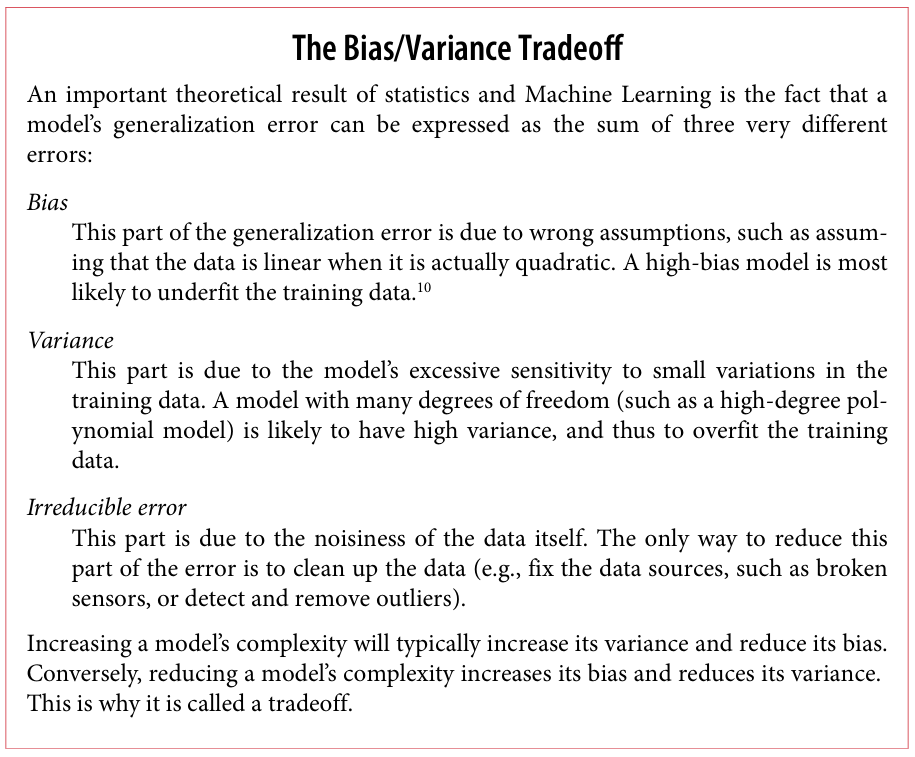

# Learning Curve

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

def plot_learning_curve(model,X,Y):
    X_train,X_val,y_train,y_val=train_test_split(X,Y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mse(y_train[:m],y_train_predict))
        val_errors.append(mse(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label='val')

In [11]:
# ## Explaination
# Blue line is validation error, and red line is testing error.
# at first there are very few training points therefor model is able to fit them all and training error starts with 0.
# But since this is not true line therefor model is not able to generalize on validation datapoints and validation error starts with high.

# Now as more points added into training set, the error increases bcz of noise and also since actual data is polynomial and we are using linear model 
# therefor model is not able to fit training points and error increases upto a point where adding more training point won't add any change to average error of that model.

# meanwhile in validation error the linear error reduce a bit of generalization error therefor validation error curve reduces to training error curve.
# But then stay stable

In [12]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
                               ('lin_reg',LinearRegression())])
# plot_learning_curve(polynomial_regression,X,y)

In [13]:
# # Explaination
# This graph also looks like previous one, but there are 2 main difference.
# 1. The error on training set is very low.
# 2. There is a gap between curves. This means model performing better on training set but poorly on validation set, indicating its overfitting.

# Regularized Linear Model  
### [ Ridge regression | Lasso regression | Elastic Net ]   

In [14]:
# Regularization term should be added only during training. Once model is trained, we should use unregularized performance measure to evaluate performance.

# Alpha is hypterparameter that controls, how much regularized model would be, if alpha=0 then its normal MSE function, and if alpha is too large then model will be flat line passing through mean of training point.

<h2 style='color:#db310f;'> Failed Try </h2>

In [15]:
import plotly.graph_objects as go
fig = go.Figure()


from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=10,include_bias=True)
poly.fit(X)
x_poly=poly.transform(X)



total_features=x_poly.shape[1]
ls_1,ls_2=(5,50) 
n_epoch=10
theta=np.random.randint(low=1,high=10,size=(total_features,1))
alpha=5
def learning_schedule(eta_current):
    return ls_1/(ls_2+eta_current)
weights={}
eta=10
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_poly)
x_poly=scaler.transform(x_poly)
for epoch in range(n_epoch):
    x,y=shuffle(x_poly,y,random_state=epoch)
    for i in range(len(x)):
        random_x,random_y=x[i:i+1],y[i:i+1]
        m=len(random_x)
        theta_star=np.concatenate([np.array([[0],]),theta[1:]],axis=0)
        gradient_vector=(2/m)*(random_x.transpose().dot(random_x.dot(theta)-random_y) + alpha*theta_star)
        eta=learning_schedule(eta)
        theta=theta-eta*gradient_vector
        weights[epoch] = weights.get(epoch,[])+[theta]
        if i%100==0:
            predict=x.dot(theta)
            fig=fig.add_trace(go.Scatter(x=np.reshape(X,newshape=(200,)),
                                         y=np.reshape(predict,newshape=(200,)),
                                         mode='markers',marker_color='rgba(105, 113, 193 , 0.9)'))

## Lets Try Again

In [16]:
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

n_epoch=50
ls_1, ls_2=(5,50)
def learning_schedule(t):return ls_1/(ls_2+t)
learning_rate=10
alpha=0.4

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(include_bias=False,degree=10)
x_poly=poly.fit_transform(X)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_poly_scaled=scaler.fit_transform(x_poly)
x_poly_scaled=np.concatenate([np.ones(shape=(m,1)),x_poly_scaled],axis=1)  # Here I am including Bias term after scaling features :) 
theta=np.random.randint(low=1,high=5,size=(x_poly_scaled.shape[1],1))

fig=go.Figure()
fig=fig.add_trace(go.Scatter(x=np.reshape(X,(m,)),y=np.reshape(y,(m,)),name='Original Data',
                             marker_color='rgba(134, 191, 119, 0.9)',mode='markers'))
from sklearn.utils import shuffle
for epoch_number in range(n_epoch):
    x_shuffle,y_shuffle=shuffle(x_poly_scaled,y,random_state=epoch_number)
    for i in range(m):
        random_x,random_y=(x_shuffle[i:i+1],y_shuffle[i:i+1])
        learning_rate=learning_schedule(epoch_number * m + i)
        theta_star=np.concatenate([np.array([[0]]),theta[1:]],axis=0)
        gradient=2*random_x.transpose().dot(random_x.dot(theta)-random_y) + 2*alpha*theta_star
        theta=theta - learning_rate*gradient
        if ((epoch_number>20) & (i%90==0)):
            predictions=x_poly_scaled.dot(theta)
            fig=fig.add_trace(go.Scatter(x=np.reshape(X,(m,)),y=np.reshape(predictions,(m,)),name=f'Predicted {epoch_number}:{i}',
                         marker_color='rgba(249, 180, 129, 0.3)',mode='markers'))
predictions=x_poly_scaled.dot(theta)
fig=fig.add_trace(go.Scatter(x=np.reshape(X,(m,)),y=np.reshape(predictions,(m,)),name=f'Final Equation',
                         marker_color='rgba(60, 94, 231  , 0.9)',mode='markers'))

fig=fig.update_layout(height=600,width=1000,title='Quadratic eqn', plot_bgcolor='rgba(0, 0, 0, 0)')
fig.update_layout(barmode='group')
fig.update_xaxes(showticklabels=True)
fig.update_yaxes(showticklabels=True)
fig.show()

<H1 Style='color:orange;'> Lasso Regression </H1>

In [17]:
def plot_prediction(X, y, theta, epoch):
    X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_test_poly = poly.transform(X_test)
    X_test_scaled = scaler.transform(X_test_poly)
    X_test_prepared = np.c_[np.ones((100, 1)), X_test_scaled]  # Add bias
    
    y_pred = X_test_prepared.dot(theta)  # Predicted values
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X.ravel(), y=y.ravel(), mode='markers', name='Actual Data', marker=dict(color='red')))
    fig.add_trace(go.Scatter(x=X_test.ravel(), y=y_pred.ravel(), mode='lines', name=f'Prediction (Epoch {epoch})', line=dict(color='blue')))
    
    fig.update_layout(title=f'Lasso Regression Prediction at Epoch {epoch}', xaxis_title='X', yaxis_title='y')
    fig=fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)')
    fig.update_layout(barmode='group')
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)
    fig.show()

In [18]:
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


ls_1,ls_2=5,50
def learning_schedule(t):return ls_1/(ls_2+t)
n_epoch=50

# Lets transform this eqn to polynomial equation
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(include_bias=False,degree=10,)
poly.fit(X)
x_poly=poly.transform(X)

# Since Stochastic gradient Descent is sensitive to UnScaled data therefore lets Standardize this
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_poly)
scaled_poly_x=scaler.transform(x_poly)
ones=np.ones(shape=(m,1))
x_prepared=np.concatenate([ones,scaled_poly_x],axis=1)

alpha=12
theta = np.random.randint(low=7,high=17,size=(11,1))
from sklearn.utils import shuffle
for epoch in range(n_epoch):
    x_,y_=shuffle(x_prepared,y,random_state=epoch)
    for i in range(m):
        random_x,random_y=x_[i:i+1],y_[i:i+1]
        eta=learning_schedule(epoch*m+i)
        theta_star=np.concatenate([np.array([[0]]),theta[1:]],axis=0)
        differentiable_theta_star=np.sign(theta_star)
        gradient_vector=2*random_x.transpose().dot(random_x.dot(theta)-random_y) + alpha*differentiable_theta_star
        next_step=eta*gradient_vector
        theta=theta-next_step
        
    if epoch % 10 == 0 or epoch==n_epoch-1:
        plot_prediction(X, y, theta, epoch)